In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.eager.backprop import GradientTape

"""
tf.GradientTape()
  - 역전파(Back propagation을 하기 위해 Forward propagation에서 진행된 값들을 저장)
  - model에서 prediction이 나오는 부분 뿐만아니라 loss가 계산되는 부분까지의 gradient, 즉 Forward propagation의 연산값들을 저장해야 될 필요가 있다.
"""

'\ntf.GradientTape()\n'

In [2]:
t1 = tf.Variable([1, 2, 3], dtype=tf.float32)
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

# forward propagation 일으키기
with tf.GradientTape() as tape:
  t3 = t1 * t2 # forward propagation

print(t1.numpy())
print(t2.numpy())
print(t3.numpy())

gradients = tape.gradient(t3, [t1, t2]) # weights에 대한 편미분과, bias에 대한 편미분을 구하는 것과 동일

print(type(gradients))
print('dt1:', gradients[0]) # t3에 대해서 t1에 대한 편미분 = t2
print('dt2:', gradients[1]) # t3에 대해서 t2에 대한 편미분 = t1

[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.]
<class 'list'>
dt1: tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [3]:
t1 = tf.Variable([1, 2, 3], dtype=tf.float32)
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
  t3 = t1 * t2
  t4 = t3 + t2

gradients = tape.gradient(t4, [t1, t2, t3])

print(type(gradients))
print('dt1:', gradients[0])
print('dt2:', gradients[1])
print('dt3:', gradients[2])

<class 'list'>
dt1: tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2: tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3: tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


In [4]:
t1 = tf.constant([1, 2, 3], dtype=tf.float32) # input value
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
  t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])

print(type(gradients))
print('dt1:', gradients[0]) # backpropagation이 일어날 필요가 없기 때문에 None
print('dt2:', gradients[1])

<class 'list'>
dt1: None
dt2: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [5]:
# linear regression 진행

x_data = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_data = 3 * x_data + 1 # 3x + 1

print(x_data.dtype, y_data.dtype)

w = tf.Variable(-1.)
b = tf.Variable(-1.)

EPOCHS = 10
learning_rate = 0.01

w_trace, b_trace = [], []
for epoch in range(EPOCHS):
  for x, y in zip(x_data, y_data):
    with tf.GradientTape() as tape:
      prediction = x * w + b # model
      loss = (prediction - y) ** 2 # loss object
    
    gradients = tape.gradient(loss, [w, b])
    
    w_trace.append(w.numpy())
    b_trace.append(b.numpy())
    
    w = tf.Variable(w - learning_rate * gradients[0])
    b = tf.Variable(b - learning_rate * gradients[1])

<dtype: 'float32'> <dtype: 'float32'>


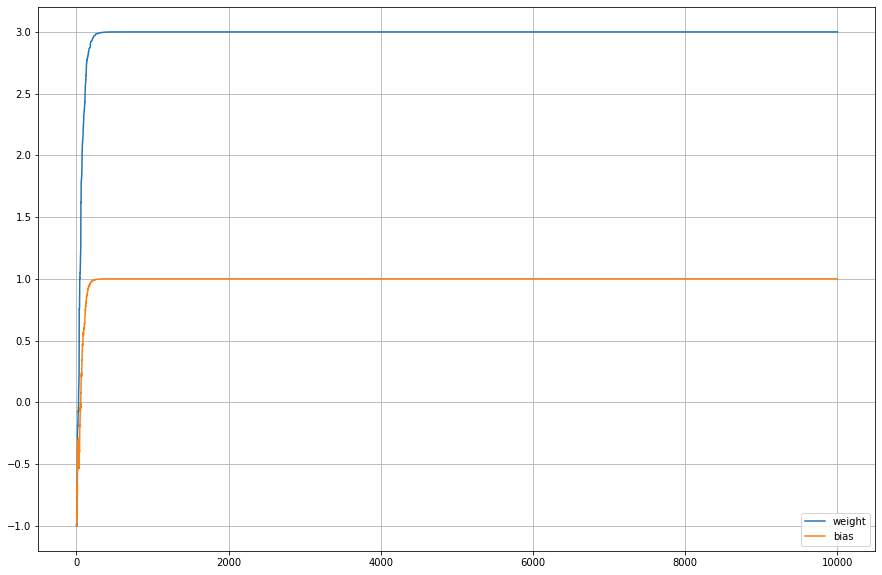

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')
ax.tick_params(labelsize=10)
ax.legend(fontsize=10)
ax.grid()